# Data Analytics - Modelo de Regressão Linear

# Conhecendo o Dataset


## Importando bibliotecas

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes.</p>
</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

In [4]:
dados = pd.read_csv('/content/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [5]:
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Verificando o tamanho do dataset

In [6]:
# Olhando o tamanho da base
dados.shape

(1000, 7)

# Tratamento dos dados



In [7]:
dados.duplicated().sum()

0

In [8]:
# Caso a base tivesse valores duplicados, esse código droparia eles
dados.drop_duplicates(inplace=True)

In [9]:
# Nossa base não tem dados nulos
dados.isnull().sum()

precos       0
area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
dtype: int64

In [10]:
dados['precos'].median()

41725.0

## Estatísticas descritivas

* Análise:
* MÉDIA
 * Olhando o describe, vimos que a média de preços é de 41.985, a média da área dos imóveis é de 124 metros, média de garagem e de lareiras por imóveis de 2 e média de 3 banheiros por imóveis.

* DESVIO
 * O desvio de preço é de 12.000, o da área 72, a garagem tem um desvio de 0.81, banheiros e lareiras tem um desvio de 1.40 e mármore e andare um desvio de aproximadamente 0.50.

* MEDIANA
 * A mediana de preços é de 41.725, mediana da área de 123, garagem e lareiras uma mediana de 2, banheiros de 3 e marmore e andares por serem variáveis binarias tem uma mediana de 0.

In [11]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


In [12]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [13]:
import seaborn as sns

In [14]:
# Utilizando o px.box para conseguir ver mais detalhes dos quartis

fig = px.box(dados, y="precos")
fig.show()

### Box-plot (Preço X Garagem)



<Axes: title={'center': 'Valor do imóvel'}, xlabel='Vagas na garagem', ylabel='Preço'>

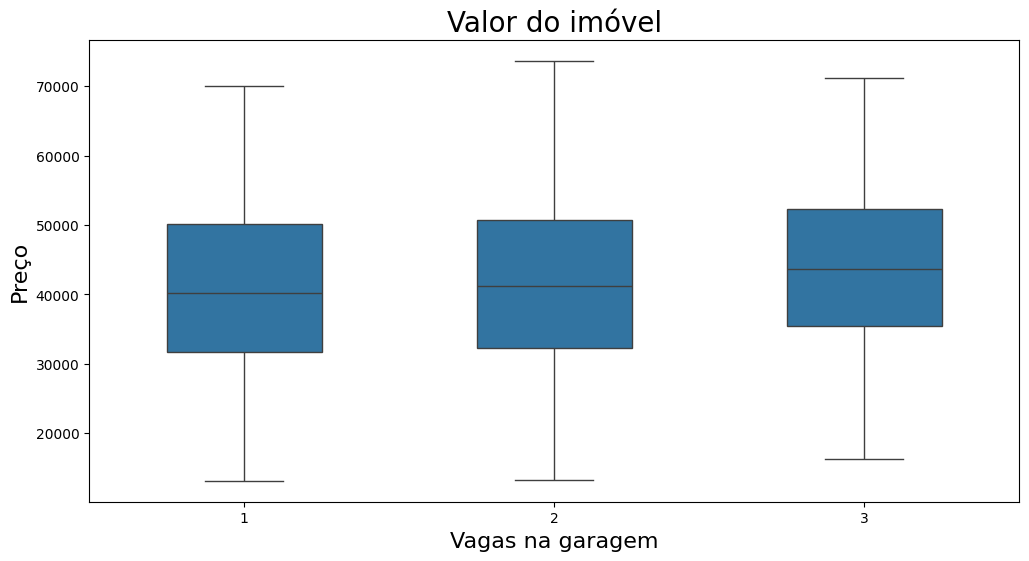

In [15]:
ax = sns.boxplot(y='precos', x='garagem', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Vagas na garagem', fontsize=16)
ax

### Box-plot (Preço X Banheiros)


<Axes: title={'center': 'Valor do imóvel'}, xlabel='Quantidade de banheiros', ylabel='Preço'>

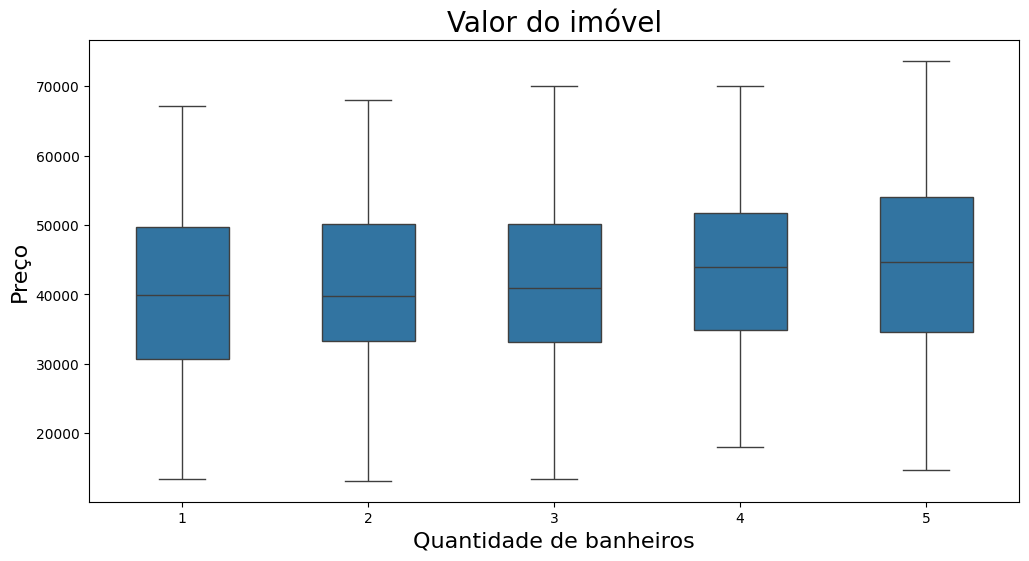

In [16]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Quantidade de banheiros', fontsize=16)
ax

### Box-plot (Preço X Lareira)

<Axes: title={'center': 'Valor do imóvel'}, xlabel='Quantidade de lareiras', ylabel='Preço'>

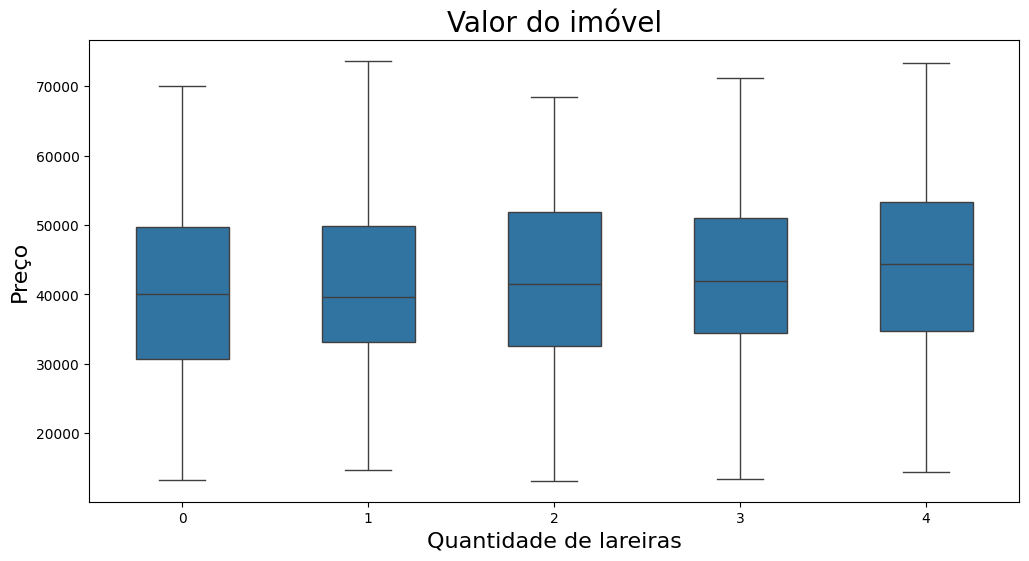

In [17]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Quantidade de lareiras', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

<Axes: title={'center': 'Valor do imóvel'}, xlabel='marmore', ylabel='Preço'>

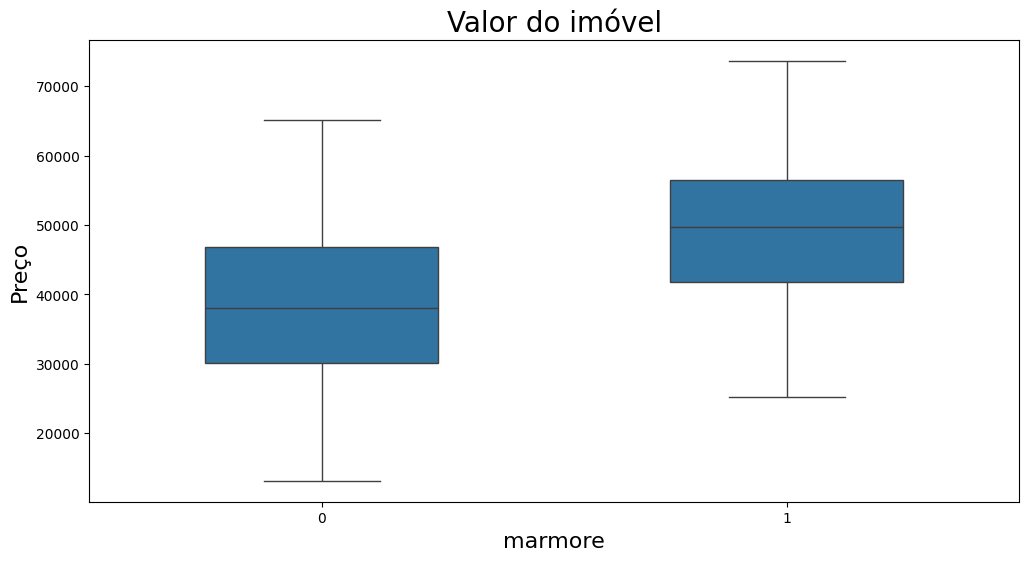

In [18]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('marmore', fontsize=16)
ax

### Box-plot (Preço X Andares)

<Axes: title={'center': 'Valor do imóvel'}, xlabel='andares', ylabel='Preço'>

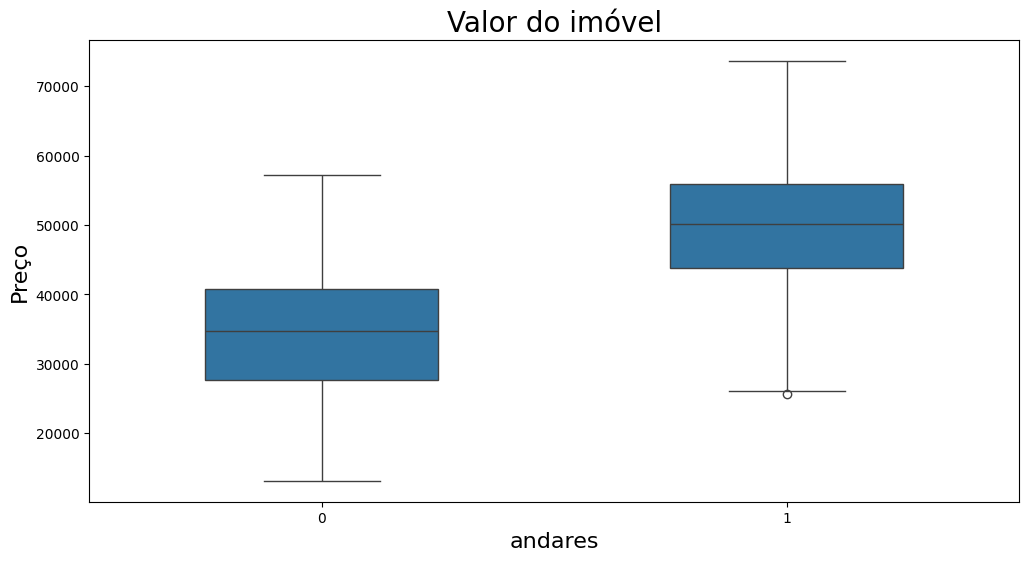

In [19]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('andares', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

<ipython-input-20-7694b311a986>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='precos', ylabel='Valor dod imóveis'>

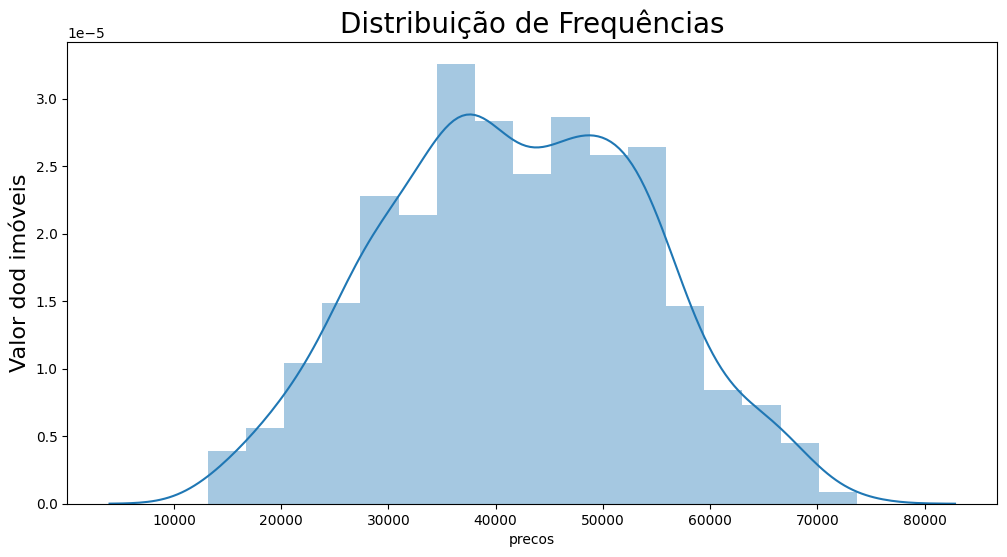

In [20]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Valor dod imóveis', fontsize=16)
ax

<Axes: >

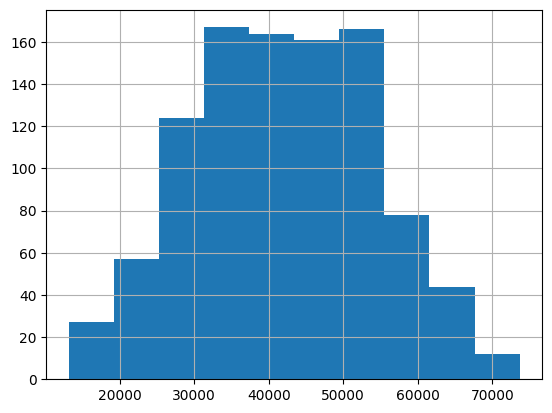

In [21]:
# Analisando o histograma abaixo percebemos que a maioria dos imóveis está entre 30.000 e 55.000

dados['precos'].hist()

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y


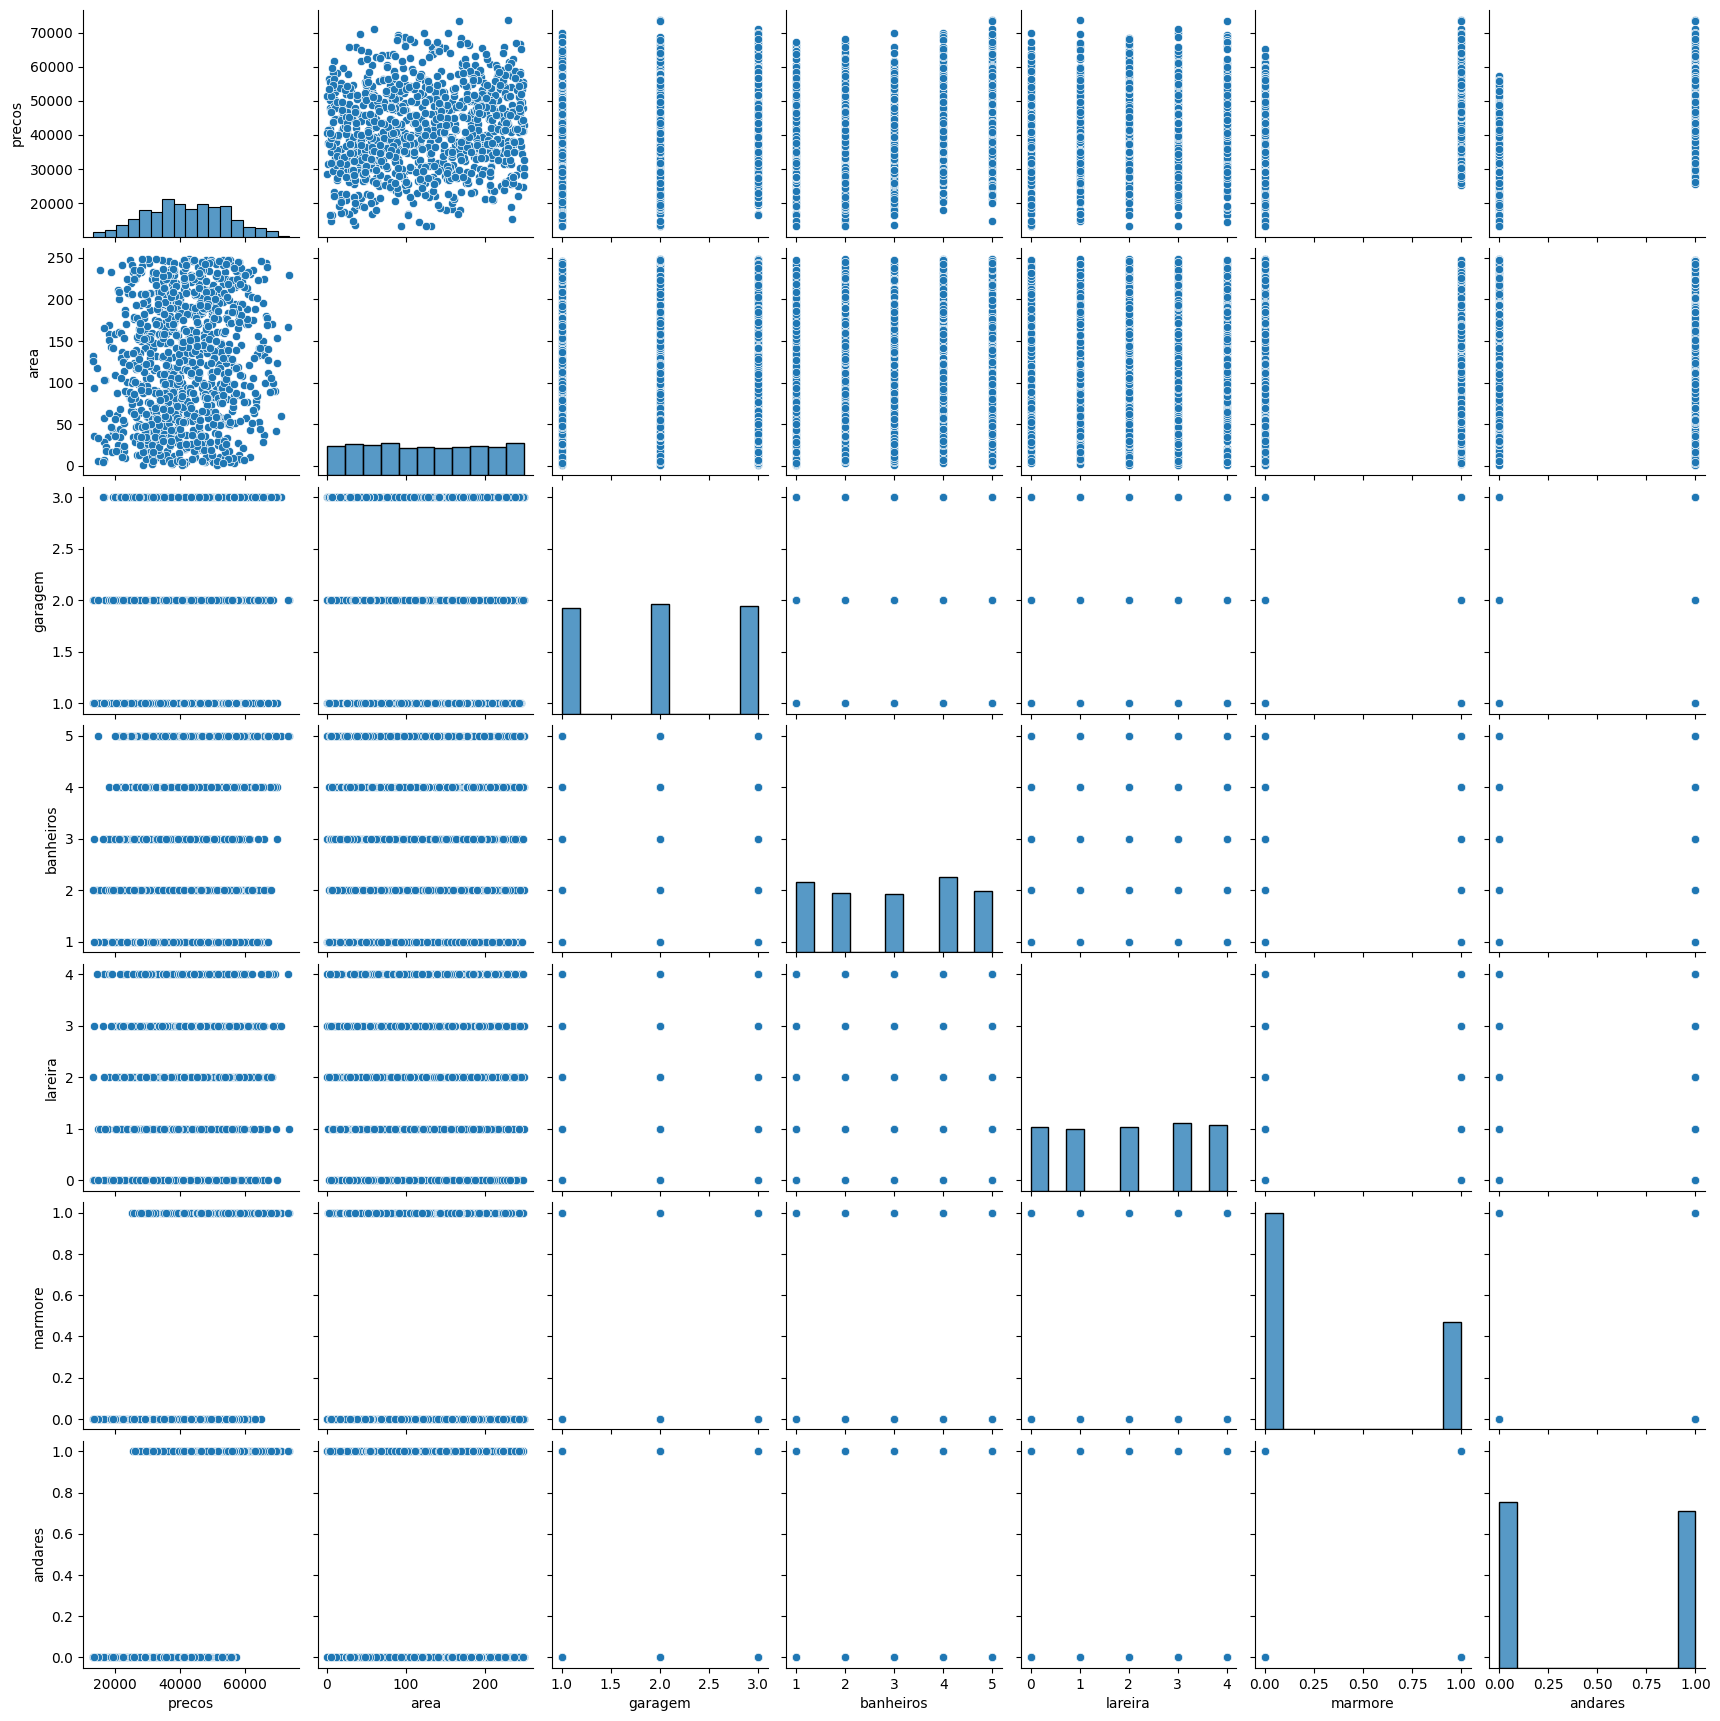

In [22]:
ax = sns.pairplot(dados)

## Estimando um Modelo de Regressão Linear


## Importando o *train_test_split* da biblioteca *scikit-learn*



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [24]:
# Definindo o preço como a variavel resposta

y = dados.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [25]:
dados.columns

Index(['precos', 'area', 'garagem', 'banheiros', 'lareira', 'marmore',
       'andares'],
      dtype='object')

In [26]:
# Atribuindo ao x as variáveis de entrada
# Escolhemos essas variáveis porque com elas os modelos ficam melhores.

x = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
# Usando o MinMaxScaler para normalizar as variáveis de entrada

padrao = MinMaxScaler()
x_pad = padrao.fit_transform(x)

## Criando os datasets de treino e de teste

In [29]:
# Definindo 30% dos dados para teste porque é um padrão do mercado

x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.3, random_state=5502)

In [30]:
# Confirmando o tanto de dados para treino e teste

print(x_train.shape)
print(x_test.shape)


(700, 6)
(300, 6)


## Instanciando a classe *LinearRegression()*

In [31]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)



In [32]:
# Treinando o modelo

modelo.fit(x_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO



In [33]:
modelo.score(x_train, y_train).round(2)

0.64

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*


In [34]:
predlr = modelo.predict(x_train)

In [35]:
predlr_test = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo



# Score da regressão Linear

In [36]:
from sklearn.metrics import r2_score as r2

In [37]:
# Estou pegando o predict do x_test e o y_test e vendo se o modelo está bom utilizando o R².

r2(y_test, predlr_test)

0.6627916019016163